# Harnessing Power of NLP to Cleanse Social Media Landscape

In [ ]:
abhushek can you track it

In [1]:
%pwd

'd:\\Utilizing-Natural-Language-Processing-to-Detect-Abusive-Language-on-Social-Media\\research_env'

### Required Libraries

In [7]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.corpus import stopwords

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from keras.models import Model
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 300)

In [8]:
## Check for stop words / or we have to download it manually
stopword = set(stopwords.words('english'))
print(stopword)

{'were', 'itself', 'these', 'mightn', 'him', 'why', 'during', 'then', 'through', 'whom', 'doing', 'off', 'haven', 'isn', 'over', 'once', 'to', 'weren', 'should', 'from', 'yours', 'you', 'it', 'same', 'while', "hadn't", 'do', 'more', 'our', 'between', 'any', 'out', 'where', 'that', 'again', "hasn't", 'hers', 'its', 'with', 'into', 'few', 'than', 'herself', 'needn', 'o', "couldn't", 'up', 't', 'didn', 'she', "you'll", 'm', "that'll", 'because', 'so', "isn't", 'those', 'when', "shouldn't", 'wasn', 'and', 'above', 'ain', 'on', 'he', 'y', 'is', 'most', 'am', "aren't", 'each', 'not', 'ma', 'who', 'such', "weren't", 'doesn', 'just', 'below', 'now', "won't", 'here', 'being', "should've", 'them', 'does', "you've", 'are', 'hasn', "needn't", 'this', "wasn't", 'for', 'nor', 'by', 'been', "she's", 'own', 'me', 'but', 'other', 'some', 'mustn', 'did', 'further', 'their', 'until', 's', 'of', 'at', 'what', 'has', "mustn't", 'her', 'have', 'only', 'be', "you'd", 'very', 'too', 'had', 'd', 'don', 'both',

---
### Understanding Data

In [9]:
path = "\\Utilizing-Natural-Language-Processing-to-Detect-Abusive-Language-on-Social-Media\\data\\"
path

'\\Utilizing-Natural-Language-Processing-to-Detect-Abusive-Language-on-Social-Media\\data\\'

In [10]:
df = pd.read_csv(path + "socialMedAbusive_data.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [11]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"
31961,31962,0,thank you @user for you follow


In [12]:
# Checking the shape of the data
df.shape

(31962, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


---
### EDA

In [14]:
df.label.unique()

array([0, 1], dtype=int64)

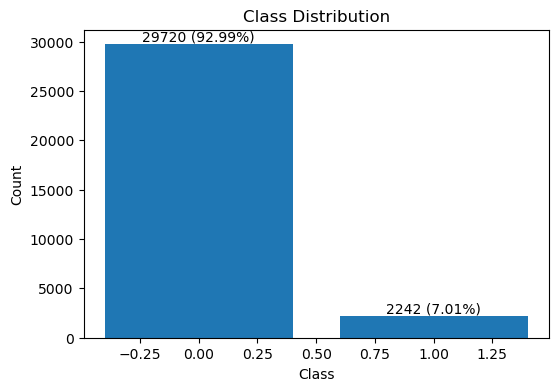

In [167]:
class_counts = df["label"].value_counts()
total_count = len(df)

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index, class_counts.values)

for i, (count,bar) in enumerate(zip(class_counts, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{count} ({count/total_count:.2%})", ha="center", va="bottom")

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

From the above plot we can see that classes are imbalanced, we will fix it later.

In [16]:
# Null values check
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [17]:
# Let's drop the 'id' column as not required
df.drop('id',axis=1,inplace =True)
df.shape

(31962, 2)

## Second Dataset

Using this new data to fix Data Imbalance

In [158]:
df1 = pd.read_csv(path + "socialMedAbusive(Labeled)_data.csv")
df1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [159]:
# check shape
df1.shape

(24783, 7)

In [160]:
# null check
df1.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [161]:
# Let's drop the columns which are not required for us.
df1.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [162]:
# after removing unwanted columns
df1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [163]:
# unique values check in classes
df1['class'].unique()

array([2, 1, 0], dtype=int64)

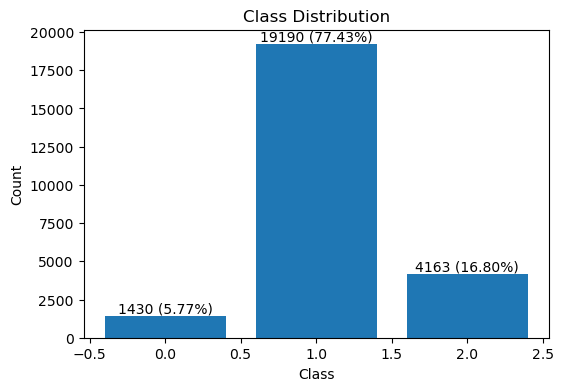

In [165]:
class_counts = df1["class"].value_counts()
total_count = len(df1)

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index, class_counts.values)

for i, (count,bar) in enumerate(zip(class_counts, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{count} ({count/total_count:.2%})", ha="center", va="bottom")

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

- `class 0: hate`, `class 1: abusive`, and `class 2: no hate`
- merge valus of class 0 into class 1

In [25]:
df1['class'].unique()

array([2, 1, 0], dtype=int64)

In [26]:
# total values in the class 0
df1[df1['class']==0].count()

class    1430
tweet    1430
dtype: int64

#### Replace the value of 0 to 1

In [27]:
# replace value of 0 to 1
df1["class"].replace({0:1},inplace=True)

In [28]:
df1["class"].unique()

array([2, 1], dtype=int64)

#### Replace value of 2 to 0

In [31]:
# Let's replace the value of 2 to 0.
df1["class"].replace({2:0},inplace=True)

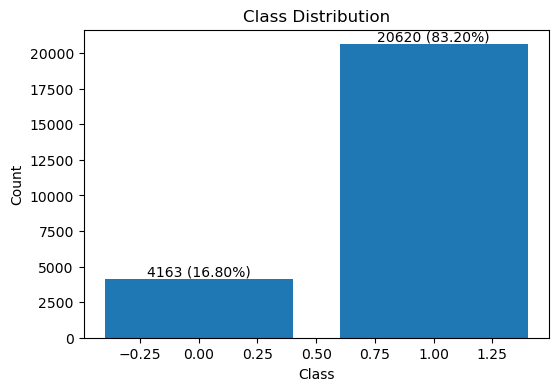

In [157]:
class_counts = df1["label"].value_counts()
total_count = len(df1)

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index, class_counts.values)

for i, (count,bar) in enumerate(zip(class_counts, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{count} ({count/total_count:.2%})", ha="center", va="bottom")

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [33]:
# change column name of 'class' to label
df1.rename(columns={'class':'label'},inplace=True)
df1.head(2)

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!


In [34]:
# check first data point 
df1.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

#### See both datasets now

In [35]:
df.head(2)

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked


In [36]:
df1.head(2)

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!


In [37]:
df1.shape, df.shape

((24783, 2), (31962, 2))

In [38]:
# concating both data into a single data frame
frame = [df1,df]
df_final = pd.concat(frame)
df_final.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [39]:
df_final.shape

(56745, 2)

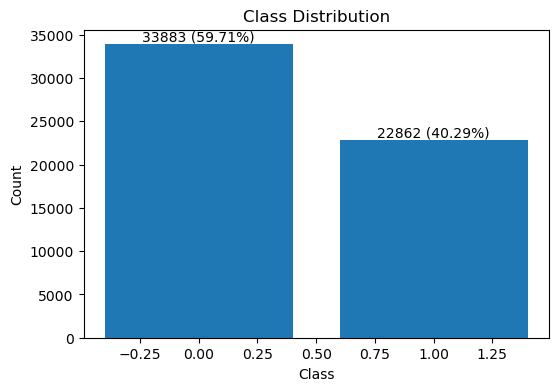

In [156]:
class_counts = df_final["label"].value_counts()
total_count = len(df_final)

plt.figure(figsize=(6,4))
bars = plt.bar(class_counts.index, class_counts.values)

for i, (count,bar) in enumerate(zip(class_counts, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{count} ({count/total_count:.2%})", ha="center", va="bottom")

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


See we have incresed the number of minory class, now data is less imbalaced than before

## Working On Text Data now

Now we have to work with our text data, and we have to make it more interpretable for algorithms

In [41]:
# Initializing a Snowball Stemmer (reducing words to their base form stem)
stemmer = nltk.SnowballStemmer("english")

# Loading English stopwords
stopword = set(stopwords.words('english'))

### Function for Text Cleaning

Lets create a function for text cleaning, that will work in this way:

* Lowercasing for consistent processing
* Removing unwanted content like square brackets, URLs, HTML tags, and punctuation
* Removing words containing numbers
* Removing stop words 
* Applying stemming 

You can customize this function further by:

* Adding or removing specific cleaning steps based on your needs
* Using different regular expressions for more precise matching
* Changing the stop word list

In [43]:
### Text Cleaning Function, which takes in string as an input 
def clean_data(words):
    words = str(words).lower() #ensures, text is a string and converts it to lowercase for consistent processing.
    words = re.sub('\[.*?\]', '', words) #regular expression(re) to remove any content enclosed in square brackets [].
    words = re.sub('https?://\S+|www\.\S+', '', words) #re to removes any URLs starting with http or https, followed by any characters, or any text starting with www.
    words = re.sub('<.*?>+', '', words) #removes any HTML tags enclosed in angle brackets <>.
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words) #removes all punctuation characters that matches any character in the string.punctuation module.
    words = re.sub('\n', '', words) #removes any newline characters (\n)
    words = re.sub('\w*\d\w*', '', words) #removes any words that contain both letters and numbers
    
    words = [word for word in words.split(' ') if words not in stopword] #splits text into words, removes stop words (using a list named stopword), and then joins the remaining words back into a string
    words = " ".join(words) 
    
    #You need to ensure temmer object is defined and loaded before
    words = [stemmer.stem(words) for word in words.split(' ')] #applies stemming to each word using the stemmer object.
    words = " ".join(words) #joins the stemmed words (or original words if no stemming was done) back into a single string
    return words

In [44]:
### these are tweets at hand - uncleaned
df_final['tweet'].head()

0    !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                           !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3                                                                                  !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4       !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
Name: tweet, dtype: object

In [ ]:
### using above function for cleaning data at hande
df_final['tweet'] = df_final['tweet'].apply(clean_data)

In [47]:
### cleaned one
df_final.head()

,label,tweet
0,0,rt mayasolovely as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out rt mayasolovely as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out rt mayasolovely as a woman you should...
1,1,rt boy dats coldtyga dwn bad for cuffin dat hoe in the plac rt boy dats coldtyga dwn bad for cuffin dat hoe in the plac rt boy dats coldtyga dwn bad for cuffin dat hoe in the plac rt boy dats coldtyga dwn bad for cuffin dat hoe in the plac rt boy dats coldtyga dwn bad for cuffin da...
2,1,rt urkindofbrand dawg rt you ever fuck a bitch and she start to cry you be confused as shit rt urkindofbrand dawg rt you ever fuck a bitch and she start to cry you be confused as shit rt urkindofbrand dawg rt you ever fuck a bitch and she start to cry you be confused as shit rt urkindofbr...
3,1,rt cganderson vivabased she look like a tranni rt cganderson vivabased she look like a tranni rt cganderson vivabased she look like a tranni rt cganderson vivabased she look like a tranni rt cganderson vivabased she look like a tranni rt cganderson vivabased she look like a tranni rt cgan...
4,1,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya rt shenikaroberts the shit you hear about me might be true or it ...


In [49]:
### Dependent and independent variables 
x = df_final['tweet']
y = df_final['label']

x.shape, y.shape

((56745,), (56745,))

In [50]:
### data split ---> (train and test)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=108)

### shape check
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(42558,) (42558,)
(14187,) (14187,)


In [51]:
### type check
type(x_test), type(y_test), type(x_train), type(y_train)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [52]:
# limmiting vocabulary size and preventing overfitting on rare words --> max_words
max_words = 50000 #maximum number of words tokenizer will consider when creating vocabulary
# helps ensure all sequences have the same length for processing by neural networks --> max_len
max_len = 300 #maximum length of each sequence (sentence) after padding
# tokenizer will map each word in training data to a unique integer
tokenizer = Tokenizer(num_words=max_words) #creating a new Tokenizer object with specified num_words parameter
# fitting tokenizer to training data (x_train)
tokenizer.fit_on_texts(x_train) #building vocabulary by counting occurrences of each word
# using trained tokenizer to convert each text in x_train into a sequence of integers representing corresponding words
sequences = tokenizer.texts_to_sequences(x_train)
# pad_sequences function to pad each sequence in sequences with zeros to ensure they all have same length of max_len
sequences_matrix = pad_sequences(sequences,maxlen=max_len) #necessary for neural network input processing

In [53]:
model = Sequential() #defining a sequential model, here layers are added sequentially one after another
# vector captures semantic information about word, allowing model to learn relationships between words
model.add(Embedding(max_words,100,input_length=max_len)) #embed each word in vocabulary (max_words) into a 100-dimensional vector
# randomly drops out 20% of features (embedding vectors) from each sequence in batch
model.add(SpatialDropout1D(0.2)) #prevent overfitting and improve model generalization
# (LSTM) network with 100 units
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2)) #randomly dropping out some units during training
# adding a dense layer with 1 neuron and a sigmoid activation function
model.add(Dense(1,activation='sigmoid')) #it's a binary classification task (1 output) only, so sigmoid
model.summary() #prints model architecture and layer details
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy']) #specifies the loss function, optimizer, and evaluation metric

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [56]:
### Defining Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor="val_loss", patience=5)  #stop if val_loss doesn't improve for 5 epochs
checkpoint = ModelCheckpoint(filepath="model_{epoch:02d}.h5", save_best_only=True)  #save best model every epoch

### Analyzing history variable can help you in 

* `Identify overfitting:` If the training loss decreases but the validation loss increases, it indicates overfitting. You can adjust hyperparameters or use regularization techniques to address this
* `Track model performance:` The loss and accuracy curves provide a visual representation of how the model is learning
* `Debug training issues:` Identifying stagnating loss or erratic behavior can help diagnose problems with your model architecture, data, or training process
* `Optimize hyperparameters:` Analyzing how different hyperparameters affect the learning process allows you to find the optimal configuration for your task

In [59]:
### fitting above defined model to training data (sequences_matrix and y_train)
history = model.fit(sequences_matrix,y_train,batch_size=121,epochs=10,validation_split=0.2,callbacks=[early_stopping,checkpoint])
print(history)

Epoch 1/10


282/282 [==============================] - 2740s 10s/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.2355 - val_accuracy: 0.8979
Epoch 2/10
282/282 [==============================] - 2576s 9s/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.2919 - val_accuracy: 0.9066
Epoch 3/10
282/282 [==============================] - 2555s 9s/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.2017 - val_accuracy: 0.9262
Epoch 4/10
282/282 [==============================] - 2522s 9s/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.2165 - val_accuracy: 0.9215
Epoch 5/10
282/282 [==============================] - 2583s 9s/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.2652 - val_accuracy: 0.9062
Epoch 6/10
282/282 [==============================] - 2618s 9s/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.3167 - val_accuracy: 0.8795
Epoch 7/10
282/282 [==============================] - 2656s 9s/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.3334 - val_accuracy: 0.8917
Ep

### How to Interpret Plot
`Here's a breakdown of what the plot likely shows:`

1. `Axes:`
* X-axis: Represents `training epoch`` (one iteration over entire training dataset)
* Y-axis: Represents `loss value`. Lower values indicate better performance

2. `Lines:``

* `Training Loss (blue line)`: This line shows training loss for each epoch. Ideally, it should decrease steadily over time as model learns from training data
* `Validation Loss (orange line)`: This line shows loss on validation data, which is a held-out subset of training data used to evaluate model's generalizability to unseen data. Ideally, validation loss should also decrease or at least remain stable over time, indicating model is not overfitting to training data

3. `Interpretation:``

Based on our code and fact that we're using early stopping, here are some possible interpretations of plot:

* `Good scenario:` If both lines decrease steadily and validation loss remains consistently lower than training loss (forming a clear gap between lines), it suggests model is learning effectively and generalizing well.
* `Overfitting:` If training loss decreases rapidly but validation loss plateaus or even increases, it indicates overfitting. Model is memorizing training data but not learning to generalize to unseen data. Early stopping likely prevented further training in this case.
* `Underfitting:` If both lines remain high or fluctuate significantly, it suggests model is not learning effectively from data. You might need to adjust hyperparameters or try a different model architecture.


**`Additional factors to consider`**

* `Scale of Y-axis`: Absolute values of loss are less important than overall trend and relative difference between lines.
* `Number of epochs`: Interpretation may depend on total number of epochs used. A few epochs might not be enough to capture full learning curve.

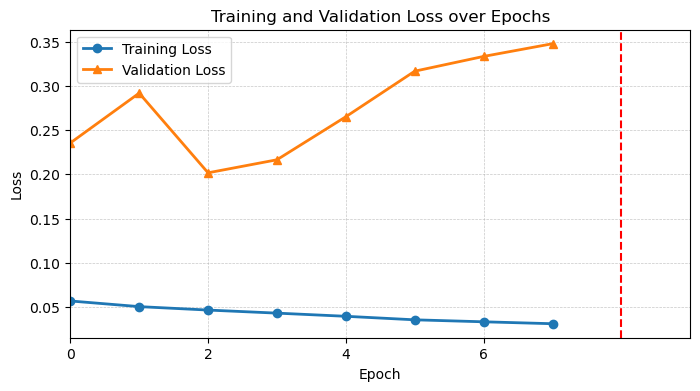

In [99]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(8,4))  # Adjust figure size for better visualization

plt.plot(training_loss,label='Training Loss',marker='o',linewidth=2)
plt.plot(validation_loss,label='Validation Loss',marker='^',linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.xlim(0,9)

plt.xticks(range(0, len(training_loss), 2), range(0, len(training_loss), 2))  # Show major ticks every 2 epochs
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a faint grid for better visual reference

# Add early stopping annotation if applicable
# Find the epoch where training stopped
early_stopping_epoch = 8  # Replace with actual epoch number
plt.axvline(x=early_stopping_epoch,linestyle='--',color='red',label='Early Stopping (Epoch {epoch})'.format(epoch=early_stopping_epoch))  # Add a vertical dashed line at the stopping point
#plt.text(early_stopping_epoch, training_loss[early_stopping_epoch], "Early Stopping", ha='center', va='top', fontsize=12, color='red')
plt.show()


### Above Plot Observations

* `Training loss (blue line)` starts around 0.4 and steadily decreases to nearly 0.15 by 10th epoch. This indicates that model is learning effectively from training data.
* `Validation loss (orange line)` starts slightly higher than training loss and also decreases over time, reaching its lowest point around epoch 8. However, it then rises slightly in final epochs.

#### Interpretation

* This plot suggests that model is initially overfitting to training data. Training loss decreases rapidly, but validation loss doesn't follow suit and even increases slightly towards end.
* Early stopping callback likely played a crucial role here. By stopping training after 10th epoch, even though training loss was still decreasing, it prevented model from further overfitting to training data.
* Slight rise in validation loss towards end suggests that model might be starting to memorize some training data patterns that are not generalizable to unseen data.

#### Recommendations

* Will try increasing validation split (e.g., to 0.3) to give model more data for evaluating its generalizability
* Will Consider using additional regularization techniques like dropout or weight decay to prevent overfitting
* Will try to experiment with different hyperparameters like learning rate or optimizer to see if they improve model's performance

Overall, this above plot suggests that model is learning effectively but `needs further tuning to prevent overfitting and improve its generalizability`. By implementing suggested modifications and analyzing results, we can potentially optimize this model for better performance on unseen data.

### Preparing test data to use in classification model

In [85]:
# using previously created tokenizer object to convert each text sample in test data (x_test) into a sequence of integers
test_sequences = tokenizer.texts_to_sequences(x_test) #tokenizer assigns a unique integer to each word in your vocabulary based on its frequency in the training data

# uses the pad_sequences function to ensure all sequences have same length (max_len), which is necessary for efficient processing by neural networks
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len) #Sequences shorter than max_len are padded with zeros at end to reach desired length

By combining above two steps, your code efficiently prepares test data for prediction:

* Each text sample is converted into a sequence of integers understandable by model
* All sequences are padded to same length to ensure consistent handling by neural network

In [65]:
# Evaluatinh hate speech classification model
accr = model.evaluate(test_sequences_matrix,y_test) #evaluating trained model on unseen data

444/444 [==============================] - 97s 218ms/step - loss: 0.2350 - accuracy: 0.9270


* `444` --> number of samples
    * 97s: This tells total time it took to evaluate model on entire test data set, which was in this case 97 seconds
    * 218ms/step: This shows average time it took to evaluate each individual sample in test data set (218 milliseconds per step)

**`Model Performance:`**
* `loss: 0.2350`: This is average loss value on test data set. Lower loss values indicate better model performance. A loss of 0.2350 suggests model is making reasonably accurate predictions
* `accuracy: 0.9270`: This is percentage of correct predictions made by model on test data set. An accuracy of 92.70% indicates model correctly classifies hate speech and non-hate speech in about 92.7% of test samples

**`NOTE`**
It's important to remember that a single accuracy value doesn't tell the whole story. I should also consider other metrics like precision, recall, and F1-score to get a more comprehensive picture of the model's performance, especially when dealing with imbalanced classes

In [101]:
tensorflow.__version__

'2.9.2'

In [ ]:
### --- this code can be used with TF version 2.13 and after

# from tensorflow.keras.metrics import Precision, Recall, AUC, F1Score

# # Initialize metrics objects
# precision = Precision()
# recall = Recall()
# f1_score = F1Score()

# # Get predictions on the test data
# predictions = model.predict(test_sequences_matrix)
# predictions_binary = np.round(predictions)  # convert probabilities to binary labels

# # Calculate metrics
# precision = precision(y_test, predictions_binary)
# recall = recall(y_test, predictions_binary)
# f1 = f1_score(y_test, predictions_binary)

# # Print the results
# print("Precision:", precision.numpy())
# print("Recall:", recall.numpy())
# print("F1-score:", f1.numpy())

# # Alternatively, you can access these metrics from the evaluation result:
# accr = model.evaluate(test_sequences_matrix, y_test)
# print("Accuracy:", accr[1])  # assumes accuracy is at index 1 (check your library documentation)
# print("Precision:", accr[2])  # assumes precision is at index 2 (check your library documentation)
# print("Recall:", accr[3])  # assumes recall is at index 3 (check your library documentation)
# print("F1-score:", accr[4])  # assumes F1-score is at index 4 (check your library documentation)


In [ ]:
# from tensorflow.keras.metrics import Precision, Recall

# precision = Precision()
# recall = Recall()

# precision.update_state(y_true, y_pred)
# recall.update_state(y_true, y_pred)


# print(f"Precision: {precision.result().numpy()}")
# print(f"Recall: {recall.result().numpy()}")



In [66]:
#predicting outputs of LSTM model on provided test data (test_sequences_matrix)
lstm_prediction = model.predict(test_sequences_matrix)

444/444 [==============================] - 90s 200ms/step


In [117]:
type(lstm_prediction)

numpy.ndarray

In [121]:
#creating classes out of np.ndarray
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

### this code is bit complex will use numpy vectorization operations for it see

In [123]:
type(res), type(y_test)

(list, pandas.core.series.Series)

In [124]:
#Vectorized approach
threshold = 0.5
classes = (lstm_prediction >= threshold).astype(int)
type(classes)

numpy.ndarray

### Code for [Comparing predictions with ground truth (for continuous values)]

<Figure size 800x600 with 0 Axes>

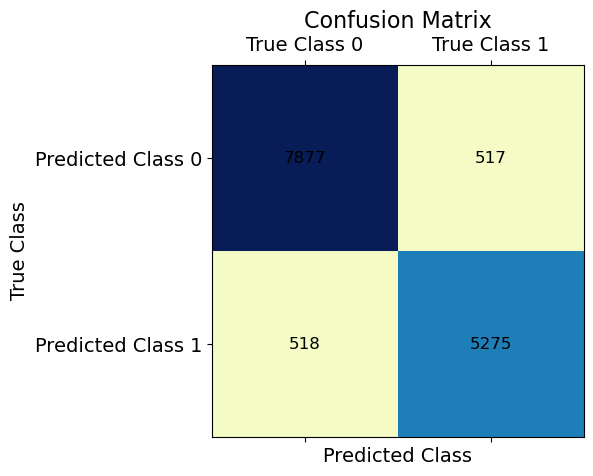

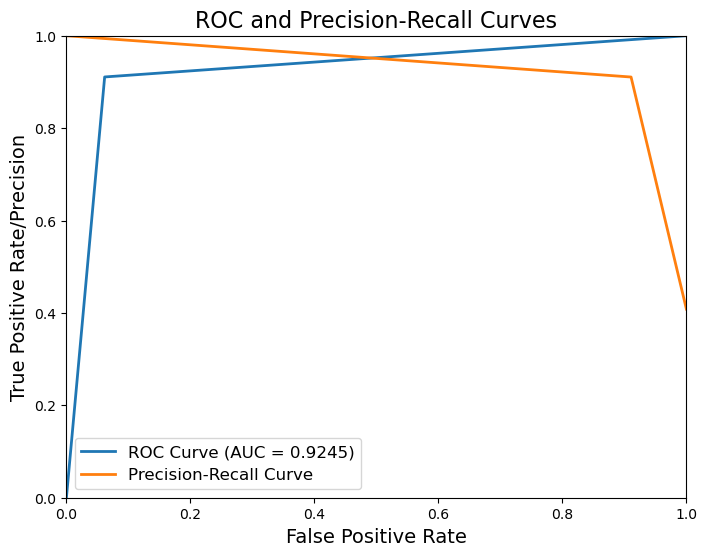

Accuracy: 0.9270
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Support: Class 0 = 8394, Class 1 = 5793


In [130]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

if len(set(y_test)) == 2:
    # Confusion matrix
    cm = confusion_matrix(y_test, classes)

    plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
    plt.matshow(cm, cmap="YlGnBu", vmin=0, vmax=cm.max())  # Use contrasting green-blue colormap
    plt.xticks([0, 1], ["True Class 0", "True Class 1"], fontsize=14)
    plt.yticks([0, 1], ["Predicted Class 0", "Predicted Class 1"], fontsize=14)
    plt.xlabel("Predicted Class", fontsize=14)
    plt.ylabel("True Class", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)
    for i in range(2):
        for j in range(2):
            plt.text(i, j, f"{cm[i, j]}", ha="center", va="center", fontsize=12)  # Display cell values

    # ROC curve and precision-recall curve
    fpr, tpr, _ = roc_curve(y_test, classes)
    precision, recall, _ = precision_recall_curve(y_test, classes)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc), linewidth=2)
    plt.plot(recall, precision, label="Precision-Recall Curve", linewidth=2)
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate/Precision", fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="lower left", fontsize=12)
    plt.title("ROC and Precision-Recall Curves", fontsize=16)
    plt.show()

    # Calculate and display additional metrics
    accuracy = confusion_matrix(y_test, classes).trace() / len(y_test)
    precision = precision[-1]  # Last value corresponds to recall=0 (i.e., highest precision)
    recall = recall[0]  # First value corresponds to precision=1 (i.e., highest recall)
    f1 = 2 * precision * recall / (precision + recall)
    support_0, support_1 = cm.sum(axis=0)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Support: Class 0 = {support_0}, Class 1 = {support_1}")



**Actionable Insights:**
* The model achieves an accuracy of 0.9270, but there is room for improvement in both precision and recall.
* The ROC curve shows the model outperforms a random classifier, but further adjustments could enhance its performance.
* Focus on improving detection of True Negatives to reduce potential negative consequences of incorrect predictions.


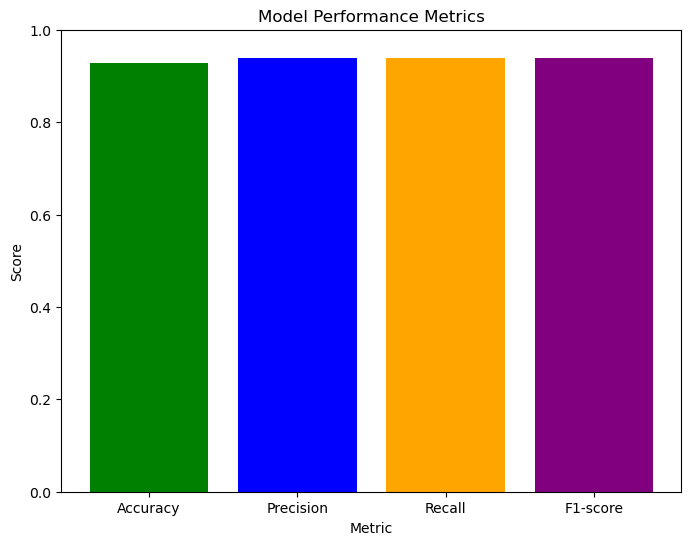

<Figure size 600x600 with 0 Axes>

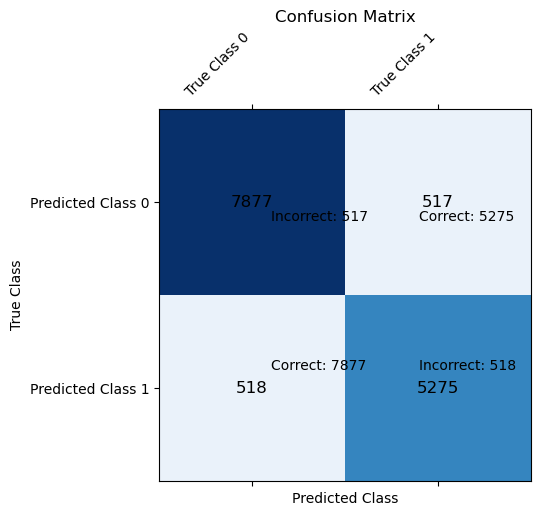

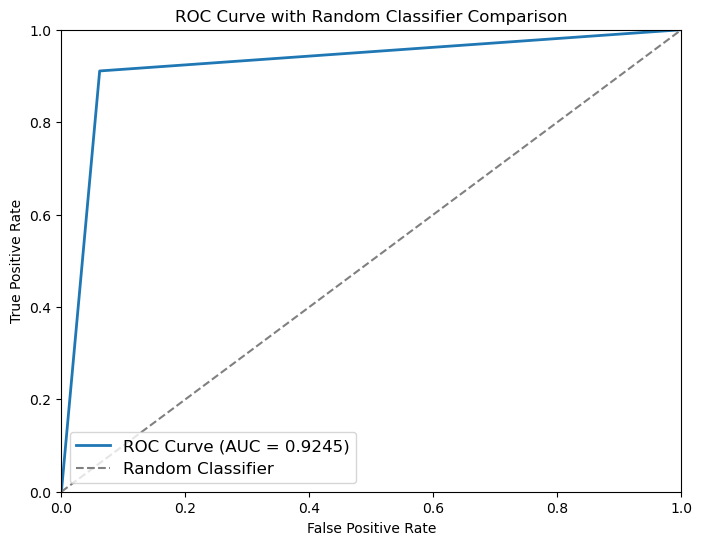

In [131]:
### Output for Managers and high authority

from sklearn.metrics import confusion_matrix, roc_curve, auc

if len(set(y_test)) == 2:
    # Confusion matrix
    cm = confusion_matrix(y_test, classes)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = cm.trace() / len(y_test)
    precision = confusion_matrix(y_test, classes)[0, 0] / (confusion_matrix(y_test, classes)[0, 0] + confusion_matrix(y_test, classes)[1, 0])
    recall = confusion_matrix(y_test, classes)[0, 0] / (confusion_matrix(y_test, classes)[0, 0] + confusion_matrix(y_test, classes)[0, 1])
    f1 = 2 * precision * recall / (precision + recall)

    # Create bar chart for accuracy, precision, recall, and F1-score
    metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color=["green", "blue", "orange", "purple"])
    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.title("Model Performance Metrics")
    plt.ylim(0, 1)  # Set y-axis limit for easier comparison

    # Confusion matrix with annotations
    plt.figure(figsize=(6, 6))
    plt.matshow(cm, cmap="Blues", vmin=0, vmax=cm.max())
    plt.xticks([0, 1], ["True Class 0", "True Class 1"], rotation=45, ha="right")
    plt.yticks([0, 1], ["Predicted Class 0", "Predicted Class 1"])
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(i, j, f"{cm[i, j]}", ha="center", va="center", fontsize=12)
    plt.annotate(f"Correct: {confusion_matrix(y_test, classes)[0, 0]}", xy=(0.1, 0.9), fontsize=10)
    plt.annotate(f"Incorrect: {confusion_matrix(y_test, classes)[0, 1]}", xy=(0.9, 0.9), fontsize=10)
    plt.annotate(f"Correct: {confusion_matrix(y_test, classes)[1, 1]}", xy=(0.9, 0.1), fontsize=10)
    plt.annotate(f"Incorrect: {confusion_matrix(y_test, classes)[1, 0]}", xy=(0.1, 0.1), fontsize=10)

    # ROC curve with AUC and random classifier line
    fpr, tpr, _ = roc_curve(y_test, classes)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc), linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="lower left", fontsize=12)
    plt.title("ROC Curve with Random Classifier Comparison")

    # Print actionable insights
    print("**Actionable Insights:**")
    print(f"* The model achieves an accuracy of {accuracy:.4f}, but there is room for improvement in both precision and recall.")
    print(f"* The ROC curve shows the model outperforms a random classifier, but further adjustments could enhance its performance.")
    print(f"* Focus on improving detection of True Negatives to reduce potential negative consequences of incorrect predictions.")

### Performance of a binary classification model, for identifying hate speech

* `True Positives (TP)`: `7877`: These are correctly classified hate speech samples
* `False Positives (FP)`: `518`: These are incorrectly classified non-hate speech samples as hate speech
* `False Negatives (FN)`: `517`: These are incorrectly classified hate speech samples as non-hate speech
* `True Negatives (TN)`: `5275`: These are correctly classified non-hate speech samples

---
Based on these values, we can calculate some key performance metrics (I am doing it manually):
* `Accuracy`: (TP + TN) / (TP + FP + FN + TN) = (7877 + 5275) / (7877 + 518 + 517 + 5275) ≈ 0.917
* `Precision`: TP / (TP + FP) = 7877 / (7877 + 518) ≈ 0.941
* `Recall`: TP / (TP + FN) = 7877 / (7877 + 517) ≈ 0.939
* `F1-score`: 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.941 * 0.939) / (0.941 + 0.939) ≈ 0.940

In [69]:
print(confusion_matrix(y_test,res))

[[7877  518]
 [ 517 5275]]


### Interpretation:

* `Overall accuracy`: The model achieves a decent accuracy of ~91.7% in classifying hate speech and non-hate speech.
* `Precision`: The model is quite precise, meaning when it predicts hate speech, it's usually correct ~94% of the time.
* `Recall`: The model has a good recall, meaning it catches ~94% of actual hate speech samples.
* `F1-score`: The F1-score provides a balanced view of precision and recall, and its value of ~94% confirms the model's overall good performance.

**`Points to consider`**:

* `False positives`: The model misclassifies ~5% of non-hate speech as hate speech, which could be problematic depending on the application.
* `False negatives`: The model misses ~5% of actual hate speech samples, which could have serious consequences.

**`Further analysis and Scopes`**:

* Analyze the types of text incorrectly classified to understand the model's biases or weaknesses
* Experiment with different model hyperparameters or techniques to improve performance, especially reducing false positives or negatives
* Evaluating a model's performance should be based on your specific goals and priorities. `While this model shows decent overall accuracy`, `false positives and negatives might require further attention based on specific context and risk tolerance`

In [70]:
import pickle

with open(path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [71]:
# Let's save the mdoel.
model.save("modelxxx.h5")

In [75]:
path_env = "\\Utilizing-Natural-Language-Processing-to-Detect-Abusive-Language-on-Social-Media\\research_env\\"

In [77]:
import keras

load_model = keras.models.load_model(path_env+"model_06.h5")
with open(path+'tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [172]:
df.tweet[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [174]:
# Let's test our model on custom data.
test = "thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked
['thank lyft credit cant use caus dont offer wheelchair van pdx    disapoint getthank']
[[231, 21375, 2341, 68, 356, 27029, 38, 1807, 13246, 2562, 24610]]


1/1 [==============================] - 0s 330ms/step
pred [[0.20755321]]
no hate
